###Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

###Get the data

In [ ]:
diamond = pd.read_csv('/content/train.csv')

###Discover and visualize the data

In [ ]:
diamond.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
diamond.shape

(43152, 11)

In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
diamond['cut'].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [ ]:
diamond['color'].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [ ]:
diamond['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [ ]:
diamond.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


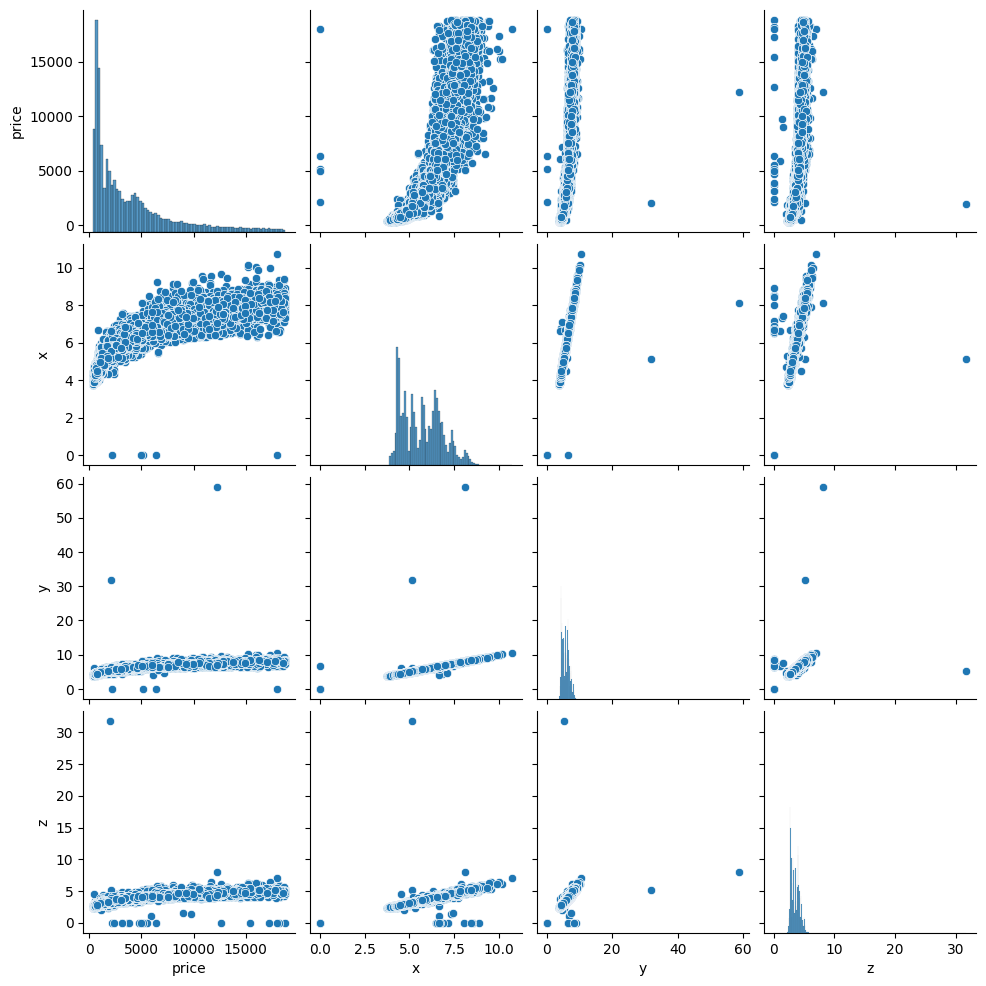

In [ ]:
attributes = ["price", "x", "y", "z"]
sns.pairplot(diamond[attributes])
plt.show()

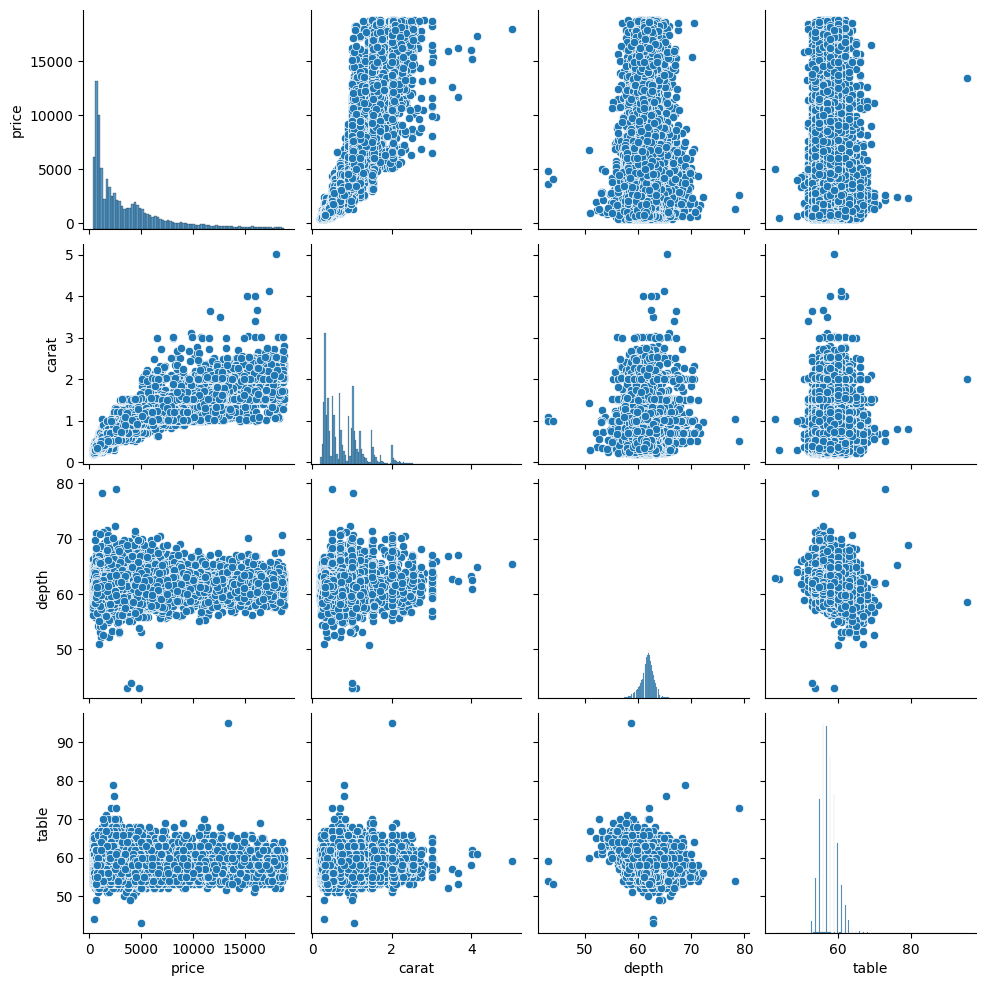

In [ ]:
attributes = ["price", "carat", "depth", "table"]
sns.pairplot(diamond[attributes])
plt.show()

<ipython-input-14-b567b775d203>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diamond.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',ax=ax)


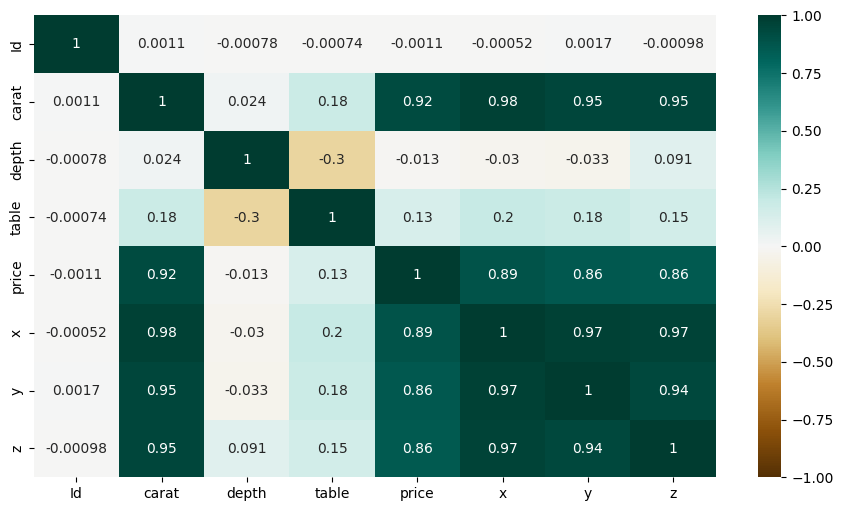

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.heatmap(diamond.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',ax=ax)
plt.show()

###Prepare the data

In [ ]:
diamond = diamond.drop_duplicates()

In [ ]:
diamond.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
diamond = diamond.drop('Id',axis=1)

In [ ]:
encoder = LabelEncoder()
diamond['cut'] = encoder.fit_transform(diamond['cut'])

In [ ]:
diamond['color'] = encoder.fit_transform(diamond['color'])

In [ ]:
diamond['clarity'] = encoder.fit_transform(diamond['clarity'])

In [ ]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


###Create a Test Set and Train Set

In [ ]:
train_set, st_setet = train_test_split(diamond,test_size = 0.2, random_state = 42) 

In [ ]:
diamond = train_set.drop('price',axis = 1)
diamond_labels = train_set['price'].copy()

###Select and Train a Model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(diamond, diamond_labels)

LinearRegression()

In [ ]:
lin_rmse = -cross_val_score(lin_reg, diamond,
diamond_labels, scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
print(pd.Series(lin_rmse).mean())
print(pd.Series(lin_rmse).std())

1364.3860191399324
47.088586858689496


In [ ]:
tree_reg = DecisionTreeRegressor()
lin_reg.fit(diamond, diamond_labels)

LinearRegression()

In [ ]:
tree_rmse = -cross_val_score(tree_reg, diamond,
diamond_labels, scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
print(pd.Series(tree_rmse).mean())
print(pd.Series(tree_rmse).std())

760.6761467773647
21.29741492861916


In [ ]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(diamond, diamond_labels)

RandomForestRegressor(random_state=42)

In [ ]:
forest_rmse = -cross_val_score(forest_reg, diamond,
diamond_labels, scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
print(pd.Series(forest_rmse).mean())
print(pd.Series(forest_rmse).std())

569.6771728350948
25.45645567132834


###Fine-Tune Your Model

In [ ]:
param_distribs = {
        'n_estimators': np.random.randint(1, 200, 10),
        'max_features': np.random.randint(1, 8, 10),
    }


rnd_search = RandomizedSearchCV(forest_reg,param_distributions=param_distribs
                                 ,n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(diamond, diamond_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': array([6, 4, 4, 3, 7, 2, 7, 4, 7, 2]),
                                        'n_estimators': array([115, 134,  81, 176, 135, 114,  17,  99, 133, 116])},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'n_estimators': 176, 'max_features': 7}

In [ ]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=176, random_state=42)

In [ ]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score), params)

570.3630134779355 {'n_estimators': 176, 'max_features': 7}
676.2971728468133 {'n_estimators': 176, 'max_features': 2}
591.3289678839017 {'n_estimators': 115, 'max_features': 4}
571.3824264672619 {'n_estimators': 114, 'max_features': 7}
570.5589450809196 {'n_estimators': 135, 'max_features': 7}
619.9892761371534 {'n_estimators': 116, 'max_features': 3}
592.7440293767373 {'n_estimators': 81, 'max_features': 4}
571.3596662755441 {'n_estimators': 115, 'max_features': 7}
591.3289678839017 {'n_estimators': 115, 'max_features': 4}
572.1813042713526 {'n_estimators': 115, 'max_features': 6}


###Evaluation

In [ ]:
X_test = test_set.drop(["price"],axis = 1)
Y_test = test_set["price"].copy()

In [ ]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(X_test.values)
final_mse = mean_squared_error(Y_test.values, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


544.7696188487886

###Evaluation On test csv

In [ ]:
test_data = pd.read_csv('/content/test.csv')

In [ ]:
Id = test_data['Id']
test_data = test_data.drop('Id',axis=1)
test_data['cut'] = encoder.fit_transform(test_data['cut'])
test_data['clarity'] = encoder.fit_transform(test_data['clarity'])
test_data['color'] = encoder.fit_transform(test_data['color'])

In [ ]:
final_predictions = final_model.predict(test_data)

In [ ]:
data={'Id': Id, 'price':final_predictions }
sub = pd.DataFrame(data=data)
sub

,Id,price
0,1,915.301136
1,2,2838.869318
2,3,816.732955
3,4,2869.732955
4,5,1090.278409
...,...,...
10783,10784,1774.647727
10784,10785,6641.329545
10785,10786,4424.272727
10786,10787,4943.272727


In [ ]:
sub.to_csv('sub.csv',index=False)